In [15]:
import pandas as pd
import seaborn as sns
import time

Index(['Unnamed: 0', 'Company Name', 'Meta data', 'Processor', 'RAM',
       'Graphic card', 'Hard disk', 'Price', 'Date', 'Time'],
      dtype='object')
   Unnamed: 0 Company Name                                          Meta data  \
0           1          hp     ['hp omen', '16.1" qhd laptop', 'shadow black']   
1           2           hp  ['hp', 'victus 15.6" gaming laptop', 'mica sil...   
2           3         asus  ['asus', 'tuf dash 15.6" gaming laptop', 'ecli...   
3           4           hp  ['hp', 'victus 15.6" gaming laptop', 'mica sil...   
4           5         asus  ['asus', 'rog zephyrus 16" wqxga 165hz gaming ...   

                        Processor          RAM                Graphic card  \
0            intel core i7 12700h  16gb memory     nvidia geforce rtx 3060   
1            intel core i5 12450h   8gb memory     nvidia geforce gtx 1650   
2               intel 11th gen i7  16gb memory     nvidia geforce rtx 3060   
3            intel core i7 12650h  16gb memory 

In [4]:
grouped_multiple = working_df.groupby(['Company Name','Meta data', 'Processor', 'RAM', 'Graphic card', 'Hard disk']).agg({'Price': ['max', 'mean', 'min']})
grouped_multiple.columns  = ['Price_max', 'Price_mean', 'Price_min']
grouped_multiple.reset_index(inplace = True)
print(grouped_multiple.columns)
grouped_multiple = grouped_multiple[['Company Name','Meta data','Price_max','Price_mean', 'Price_min']]
grouping_t = working_df.groupby(['Company Name','Meta data', 'Processor', 'RAM', 'Graphic card', 'Hard disk']).groups
print(working_df.head(7))
print(grouping_t)

Index(['Company Name', 'Meta data', 'Processor', 'RAM', 'Graphic card',
       'Hard disk', 'Price_max', 'Price_mean', 'Price_min'],
      dtype='object')
   Unnamed: 0 Company Name                                          Meta data  \
0           1          hp     ['hp omen', '16.1" qhd laptop', 'shadow black']   
1           2           hp  ['hp', 'victus 15.6" gaming laptop', 'mica sil...   
2           3         asus  ['asus', 'tuf dash 15.6" gaming laptop', 'ecli...   
3           4           hp  ['hp', 'victus 15.6" gaming laptop', 'mica sil...   
4           5         asus  ['asus', 'rog zephyrus 16" wqxga 165hz gaming ...   
5           6         acer  ['acer', 'nitro 5', '15.6" fhd gaming laptop',...   
6           7         dell  ['dell', 'g15re 5000 15.6" gaming laptop', '1t...   

                        Processor          RAM                Graphic card  \
0            intel core i7 12700h  16gb memory     nvidia geforce rtx 3060   
1            intel core i5 12450h   8gb 

In [16]:
def list_choices(df):
    counter = 1
    choice_dict = {}
    for choice in list(df['Meta data'].unique()):
        choice_dict[counter] = choice
        print(f"{counter}. {choice}")
        counter += 1
    return  choice_dict

1. ['acer', 'nitro 5', '15.6" fhd gaming laptop', 'black']
2. ['acer', 'predator helios 300', '15.6" fhd 165hz gaming laptop']
3. ['acer', 'predator helios 300', '15.6" qhd 240hz gaming laptop']
4. ['acer', 'predator triton 300 se', '14” 165hz creator/gaming laptop', 'gray']
5. ['acer', 'nitro 5 17.3" full hd ips 144hz gaming laptop']
6. ['acer', 'predator triton 300 se', '14” oled 90hz creator/gaming laptop']
7. ['acer', 'predator triton 500 se 16" 2560x1600 165hz laptop']
8. ['acer', 'predator helios 300 gaming laptop', '15.6" qhd 240hz ips']
9. ['acer', 'nitro 5', 'gaming laptop', '15.6" fhd']
Price_distribution for ['acer', 'nitro 5', '15.6" fhd gaming laptop', 'black'] is ...


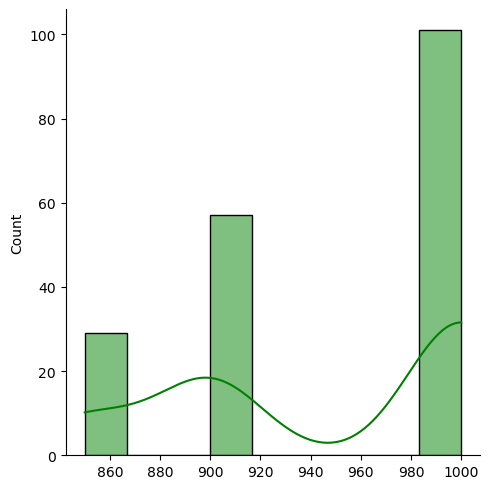

In [26]:
import matplotlib.pyplot as plt
working_df = pd. read_csv('modules/maintenance.csv')
company_name = input("Please input the company name you wish to check stats for")
companies = list(working_df['Company Name'].unique())
if company_name.lower() in companies:
    company_df = working_df.loc[working_df['Company Name'] == company_name]
    choices_dict = list_choices(company_df)
    time.sleep(1)
    model = input("Please enter the choice for the model needed")
    model_name = choices_dict[int(model)]
    print(f"Price_distribution for {model_name} is ...")
    company_prices = company_df.loc[company_df['Meta data'] == model_name, 'Price'].tolist()
sns.displot(company_prices, kde = True, color= 'g')
plt.show()